In [1]:
from sklearn import datasets
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()

# X is the feature matrix with 150 samples and 4 features, but we are only using the 3rd and 4th features
X = iris.data[:, [2, 3]]

# y is the target vector with 150 samples
y = iris.target

# Unique return the unique values in an array
np.unique(y)

array([0, 1, 2])

In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# The test set will be 30% of the original dataset
# The training set will be 70% of the original dataset
# The random_state is the seed used by the random number generator
# The stratify parameter makes a split so that the proportion of the target classes is the same in both the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# np.bincount returns the number of occurrences of each value in an array of non-negative integers
print(f"Label counts in y: {np.bincount(y)}")
print(f"Label counts in y_train: {np.bincount(y_train)}")
print(f"Label counts in y_test: {np.bincount(y_test)}")

Label counts in y: [50 50 50]
Label counts in y_train: [35 35 35]
Label counts in y_test: [15 15 15]


In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Fit the X_train to avoid data leakage
sc.fit(X_train)

# Transform the X_train and X_test
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron
# The learning rate is set to 0.1
#   The learning rate is a hyperparameter that controls how much we are adjusting the weights of our network with respect to the loss gradient
#   The learning rate is a value that we set to control how quickly the model learns a problem
#   If eta is to small, the model will learn slowly, specially if the data is large
#   If eta is too large, the model will learn quickly, but it may not converge
# The random_state is set to 1 to make the results reproducible
ppn = Perceptron(eta0=0.1, random_state=1)

# Fit the Perceptron
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [5]:
# Predict the target values
y_pred = ppn.predict(X_test_std)

# Print the number of misclassified samples
print(f"Number of misclassified samples: {(y_test != y_pred).sum()}")

Number of misclassified samples: 1


In [6]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
print(f"Accuaracy score: {accuracy_score(y_test, y_pred)}")

# Calculate the accuracy using the Perceptron score method
print(f"Accuaracy score perceptron: {ppn.score(X_test_std, y_test)}")

Accuaracy score: 0.9777777777777777
Accuaracy score perceptron: 0.9777777777777777


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0],
                       y=X[y == cl, 1],
                       alpha=0.8,
                       c=colors[idx],
                       marker=markers[idx],
                       label=f'Class {cl}',
                       edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='none', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='Test set')

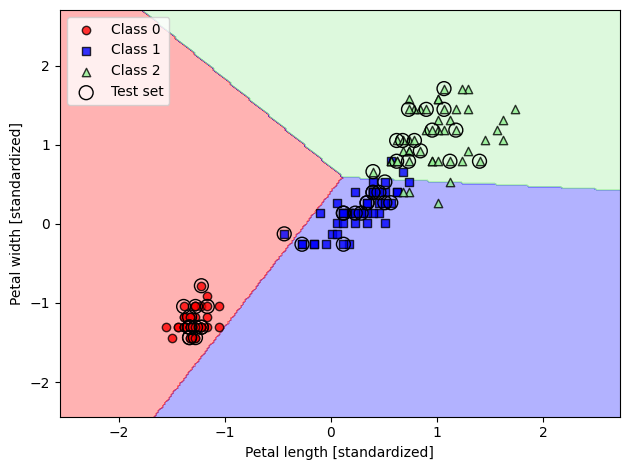

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()